# Lab 3 : Working with Neural Networks

---


Total Points: **100**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs Aroof Aimen (2018csz0001@iitrpr.ac.in), Vidhya Kamakshi (2017csz0005@iitrpr.ac.in)

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run 
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.
11. **Please make a 10-minute video explaining your lab. Please provide a link to your video shared via the google drive in your notebook itslef (in a seperate text block). Follow the following naming convention: Name_rollnumber_NB.ipynb and Name_rollnumber_video.mkv respectively.** 
12. **Submissions without links for the videos, incorrect naming conventions, or incorrect folder arrangement will not be evaluated.**


In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Boston house Price Dataset for the regression problem, and for multi-class classification, we will consider Fashion-MNIST Dataset. For Boston house Price dataset details visit - https://scikit-learn.org/stable/datasets/toy_dataset.html. For Fashion-MNIST dataset you may get it using keras (see documentation) Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist


---



Section 1:  **(Total points = 50)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the house prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) *Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section*

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Also, show the coorelation of each column with the target values in the dataset using multi-plots. **(3 point)**
2. Perform data pre-processing operations like standardization and splitting (80:20) of data.  **(2 points)**
3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh actionations at each layer of MLP for the user.  **( 15 points)**
4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(15 points)**
5. Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**
6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001].  **(5 points)**
7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Comment on your observations. **(3+2 = 5 points)**

In [ ]:
#Declaration Block
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [ ]:
housing = load_boston() # Loading the housing data
housing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
data = pd.DataFrame(housing["data"]) # Input data 
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
housing["feature_names"] # List of features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
target = pd.DataFrame(housing["target"]) # Ground truth house prices for each row of data
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
#Exploratory analysis
def exploratory_analysis(data, target):
  print('Exploratory Analysis')
  for column in data.columns:
    print('Average of Column ',column,'is ',data[column].mean())
    print('Maximum of Column ',column,'is ',data[column].max())
    print('Minimum of Column ',column,'is ',data[column].min())
  df = data.copy()
  df[13] = target.copy()
  plt.figure(figsize = (15,15))
  sns.heatmap(df.corr(), annot=True)

Exploratory Analysis
Average of Column  0 is  3.6135235573122535
Maximum of Column  0 is  88.9762
Minimum of Column  0 is  0.00632
Average of Column  1 is  11.363636363636363
Maximum of Column  1 is  100.0
Minimum of Column  1 is  0.0
Average of Column  2 is  11.136778656126504
Maximum of Column  2 is  27.74
Minimum of Column  2 is  0.46
Average of Column  3 is  0.0691699604743083
Maximum of Column  3 is  1.0
Minimum of Column  3 is  0.0
Average of Column  4 is  0.5546950592885372
Maximum of Column  4 is  0.871
Minimum of Column  4 is  0.385
Average of Column  5 is  6.284634387351787
Maximum of Column  5 is  8.78
Minimum of Column  5 is  3.561
Average of Column  6 is  68.57490118577078
Maximum of Column  6 is  100.0
Minimum of Column  6 is  2.9
Average of Column  7 is  3.795042687747034
Maximum of Column  7 is  12.1265
Minimum of Column  7 is  1.1296
Average of Column  8 is  9.549407114624506
Maximum of Column  8 is  24.0
Minimum of Column  8 is  1.0
Average of Column  9 is  408.237154

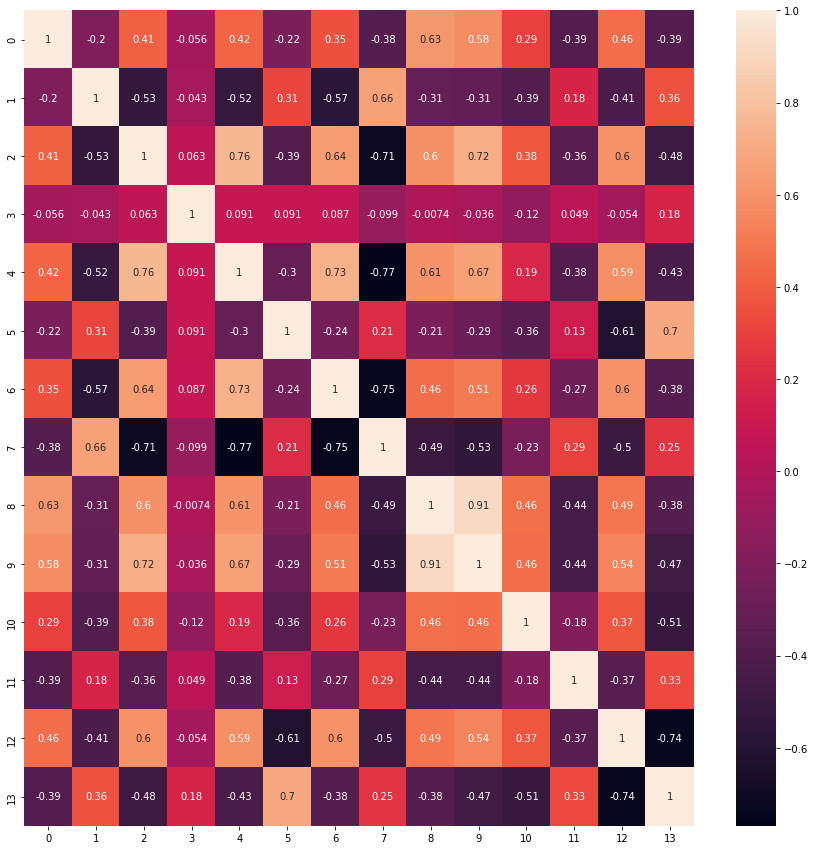

In [ ]:
exploratory_analysis(data, target)

In [ ]:
# Standardize and Splitting Dataset
def data_preprocessing(data, target):
  for column in data.columns:
    if column != 3 and column != 8:
      data[column] = (data[column] - data[column].mean()) / data[column].std()
  
  target = (target - target.mean()) / target.std()

  data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2)

  data_train = data_train.to_numpy()
  data_test = data_test.to_numpy()
  target_train = target_train.to_numpy()
  target_test = target_test.to_numpy()

  return data_train, data_test, target_train, target_test

In [ ]:
data_train, data_test, target_train, target_test = data_preprocessing(data, target)

In [ ]:
class MultilayerPerceptron():
  def __init__(self, n_hidden, activation_fn):
    self.n_hidden = n_hidden
    self.activation_fn = activation_fn()
    self.mse = MSE()

  def initialize_weights(self):
    # input to hidden
    std   = np.sqrt(2/self.x_train.shape[1])
    self.w1  = np.random.normal(loc=0, scale=std, size=(self.x_train.shape[1], self.n_hidden))
    self.b1 = np.zeros((1, self.n_hidden))

    # hidden to output
    std   = np.sqrt(2/self.n_hidden)
    self.w2  = np.random.normal(loc=0, scale=std, size=(self.n_hidden, 1))
    self.b2 = np.zeros((1,1)) 

  def train_BGD(self, x_train, y_train, epochs = 1000, learning_rate = 0.01):
    self.x_train = x_train
    self.y_train = y_train
    self.initialize_weights()
    self.losses = []

    for epoch in tqdm(range(epochs)):
      #forward propagation
      hidden_input = self.x_train.dot(self.w1) + self.b1
      hidden_output = self.activation_fn(hidden_input)
      y_pred = hidden_output.dot(self.w2) + self.b2

      loss = self.mse(self.y_train, y_pred)
      self.losses.append(loss)

      #backward propagation
      grad_output = self.mse.gradient(self.y_train, y_pred)
      grad_w2 = hidden_output.T.dot(grad_output)
      grad_b2 = np.sum(np.array(grad_output), axis=0, keepdims=True)
      grad_hidden = grad_output.dot(self.w2.T) * self.activation_fn.gradient(hidden_input)
      grad_w1 = self.x_train.T.dot(grad_hidden)
      grad_b1 = np.sum(np.array(grad_hidden), axis=0, keepdims=True)

      #update weights 
      self.w2 = - learning_rate * grad_w2
      self.b2 = - learning_rate * grad_b2 
      self.w1 = - learning_rate * grad_w1 
      self.b1 = - learning_rate * grad_b1 
    
    return self.losses

  def train_SGD(self, x_train, y_train, epochs = 1000, learning_rate = 0.01):
    self.x_train = x_train
    self.y_train = y_train
    self.initialize_weights()
    self.losses = []

    for epoch in tqdm(range(epochs)):
      loss = []

      for i in range(self.x_train.shape[0]):
        ind  = np.random.randint(self.x_train.shape[0])
        x_train_sample = self.x_train[ind]
        y_train_sample = self.y_train[ind]
        x_train_sample = x_train_sample.reshape((1, x_train_sample.shape[0]))

        #forward propagation
        hidden_input = x_train_sample.dot(self.w1) + self.b1
        hidden_output = self.activation_fn(hidden_input)
        y_pred = hidden_output.dot(self.w2) + self.b2

        loss.append(self.mse(y_train_sample, y_pred))

        #backward propagation
        grad_output = self.mse.gradient(y_train_sample, y_pred)
        grad_w2 = hidden_output.T.dot(grad_output)
        grad_b2 = np.sum(np.array(grad_output), axis=0, keepdims=True)
        grad_hidden = grad_output.dot(self.w2.T) * self.activation_fn.gradient(hidden_input)
        grad_w1 = x_train_sample.T.dot(grad_hidden)
        grad_b1 = np.sum(np.array(grad_hidden), axis=0, keepdims=True)

        #update weights 
        self.w2 = - learning_rate * grad_w2
        self.b2 = - learning_rate * grad_b2 
        self.w1 = - learning_rate * grad_w1 
        self.b1 = - learning_rate * grad_b1 
      
      self.losses.append(sum(loss)/len(loss))

    return self.losses

  def predict(self, x_test):
    hidden_input = x_test.dot(self.w1) + self.b1
    hidden_output = self.activation_fn(hidden_input)
    y_pred = hidden_output.dot(self.w2) + self.b2
    
    return y_pred

In [ ]:
class Sigmoid():
  def __call__(self, z):
    return 1 / (1 + np.exp(-z))

  def gradient(self, z):
    return self.__call__(z) * (1 - self.__call__(z))

In [ ]:
class Tanh():
  def __call__(self, z):
    return 2 / (1 + np.exp(-2*z)) - 1

  def gradient(self, z):
    return 1 - np.power(self.__call__(z), 2)

In [ ]:
class MSE():
  def __call__(self, y, y_pred):
    return np.sum(np.square(y - y_pred)) / y.shape[0]

  def gradient(self, y, y_pred):
    return - (2 / y.shape[0]) * (y - y_pred)

In [ ]:
def MLP_analysis(data_train, data_test, target_train, target_test):
  mse = MSE()

  print('Training using Batch Gradient Descent')
  MLP_BGD = MultilayerPerceptron(50, Tanh)
  BGD_train_loss = MLP_BGD.train_BGD(data_train, target_train, epochs = 1000, learning_rate = 0.0001)
  target_pred_BGD = MLP_BGD.predict(data_test)
  BGD_test_loss = mse(target_test, target_pred_BGD)

  print('Training using Stochastic Gradient Descent')
  MLP_SGD = MultilayerPerceptron(50, Tanh)
  SGD_train_loss = MLP_SGD.train_SGD(data_train, target_train, epochs = 1000, learning_rate = 0.0001)
  target_pred_SGD = MLP_SGD.predict(data_test)
  SGD_test_loss = mse(target_test, target_pred_SGD)

  fig, ax = plt.subplots(figsize=(10, 10))

  ax.plot(BGD_train_loss, label='BGD')
  ax.plot(SGD_train_loss, label='SGD')
  ax.legend()
  ax.set_title('Training error versus epochs')

  print('Test loss when batch gradient descent is used is ',BGD_test_loss)
  print('Test loss when stochastic gradient descent is used is ',SGD_test_loss)

  plt.show()

Training using Batch Gradient Descent


100%|██████████| 1000/1000 [00:01<00:00, 518.14it/s]


Training using Stochastic Gradient Descent


100%|██████████| 1000/1000 [00:40<00:00, 24.69it/s]


Test loss when batch gradient descent is used is  1.1414410397236983
Test loss when stochastic gradient descent is used is  1.1414450848251974


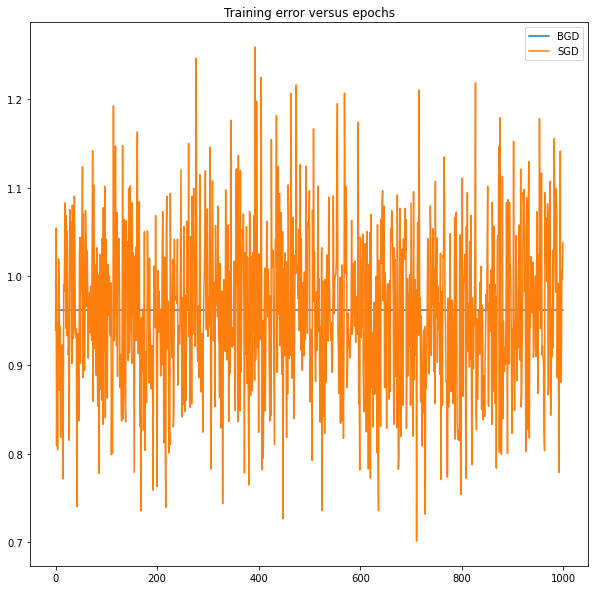

In [ ]:
MLP_analysis(data_train, data_test, target_train, target_test)

The MLP is trained using both stochastic gradient descent and batch gradient descent and the results are compared. 50 hidden nodes are taken and tanh function is used as activation function. Both models are trained by taking epochs = 1000 and learning rate = 0.001. The test loss obtained in both SGD and BGD training methods are same, which is around 1.141. In addition, we observe oscillating loss in case of SGD, whereas the loss flattens out in case of BGD. This suggests that in case of SGD, it keeps oscillating around the minima point as gradient update is performed for each training sample individually.

In [ ]:
def MLP_lr_analysis(data_train, data_test, target_train, target_test):
  learning_rates = [0.5, 0.1, 0.01, 0.001, 0.0001]
  test_losses = []
  mse = MSE()

  fig, ax = plt.subplots(2, figsize=(10, 10))
  ax[0].set_title('Training loss versus epochs')
  for lr in learning_rates:
    print('Training when learning rate is %f'%lr)
    MLP_BGD = MultilayerPerceptron(50, Tanh)
    BGD_train_loss = MLP_BGD.train_BGD(data_train, target_train, epochs = 1000, learning_rate = lr)
    target_pred_BGD = MLP_BGD.predict(data_test)
    BGD_test_loss = mse(target_test, target_pred_BGD)
    test_losses.append(BGD_test_loss)

    ax[0].plot(BGD_train_loss, label='Training loss when learning rate is %f'%lr)
    
  ax[0].legend()
  ax[1].plot(learning_rates, test_losses, marker='o')
  ax[1].set_title('Testing loss versus learning rate')

Training when learning rate is 0.500000


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 1000/1000 [00:02<00:00, 469.34it/s]


Training when learning rate is 0.100000


100%|██████████| 1000/1000 [00:01<00:00, 504.40it/s]


Training when learning rate is 0.010000


100%|██████████| 1000/1000 [00:01<00:00, 550.51it/s]


Training when learning rate is 0.001000


100%|██████████| 1000/1000 [00:01<00:00, 550.95it/s]


Training when learning rate is 0.000100


100%|██████████| 1000/1000 [00:01<00:00, 543.00it/s]


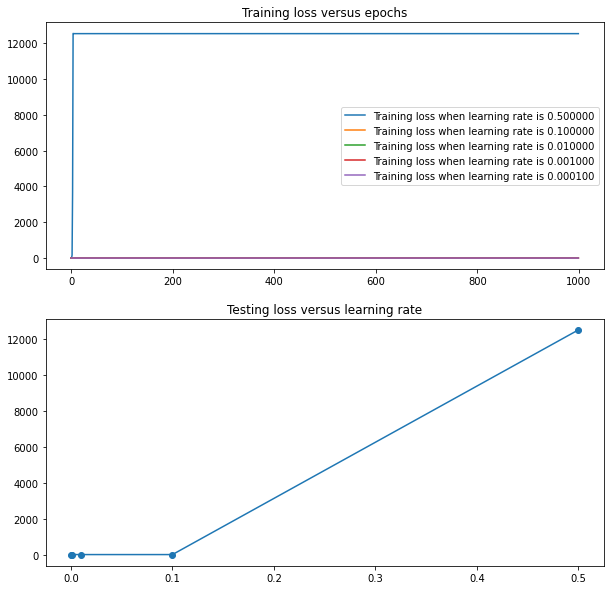

In [ ]:
MLP_lr_analysis(data_train, data_test, target_train, target_test)

From the above graph we can observe that training loss is equal in all cases except when learning rate is 0.5. Same is the case for testing loss as well. This suggests that the model gets stuck at local minima when the learning rate is really high. The other learning rates help the model reach the actual minima and they obtain minimum training and testing loss.


---



Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Fashion-MNIST using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each fashion class. **(5 points)**

2. Plot the distribution of number of images in each fashion class. Is the distribution uniform? Comment. **(5 points)**

3. Implememnt the 2D convolution function using a kernel size of 3x3. Use the [sobel kernel](https://en.wikipedia.org/wiki/Sobel_operator) and display the feature map for one example from each fashion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as $F_m = \sqrt(x^2 + y^2)$**(10 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(5 points)**
*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

3. Implement a custom cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. **(5 points)**

4. Compile and train your model with four different optimizers viz. SGD
RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**


In [ ]:
# import Fashion MNIST dataset
import keras
from keras.datasets import fashion_mnist
import random
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad
import keras.backend as K

In [ ]:
fashion_data = fashion_mnist.load_data() #load dataset
fashion_data

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_data

In [ ]:
#Dataset Exploration
def data_exploration(images, labels):
  n_classes = 10
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  n_class_images = []

  fig, ax = plt.subplots(10, figsize = (25, 25))
  for i in range(n_classes):
    idx = np.argwhere(labels == i)
    n_class_images.append(idx.shape[0])
    rand_idx = random.choice(idx)
    
    ax[i].imshow(images[rand_idx].reshape((28,28)), cmap='gray')
    ax[i].set_title(class_names[i])
    ax[i].axis('off')

  fig, ax = plt.subplots(figsize = (10, 10))
  ax.bar(class_names, n_class_images)
  ax.set_title('Distribution of images')
  plt.show()

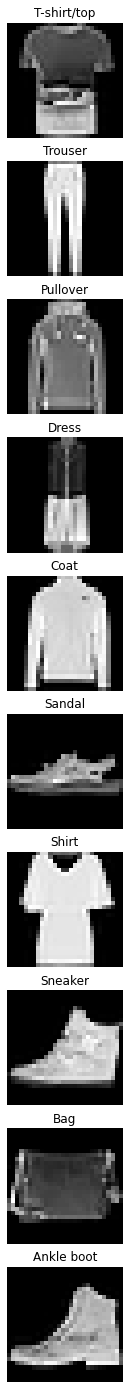

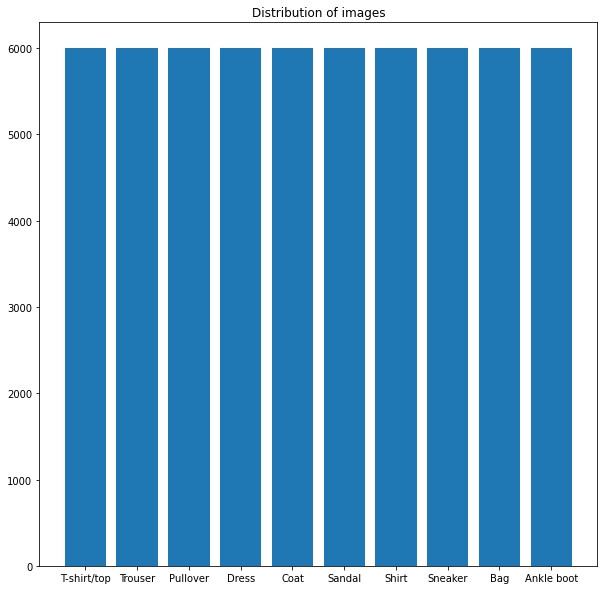

In [ ]:
data_exploration(train_images, train_labels)

In [ ]:
def sobel_kernel(image):
  x = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
  y = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

  rows, columns = np.shape(image) 
  sobel_image = np.zeros(shape=(rows, columns)) 

  for i in range(rows - 2):
    for j in range(columns - 2):
      gx = np.sum(np.multiply(x, image[i:i + 3, j:j + 3]))
      gy = np.sum(np.multiply(y, image[i:i + 3, j:j + 3])) 
      sobel_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2) 

  return sobel_image

In [ ]:
def sobel_kernel_analysis(images, labels):
  n_classes = 10
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  n_class_images = []

  fig, ax = plt.subplots(10, figsize = (25, 25))
  for i in range(n_classes):
    idx = np.argwhere(labels == i)
    n_class_images.append(idx.shape[0])
    rand_idx = random.choice(idx)
    
    ax[i].imshow(sobel_kernel(images[rand_idx].reshape((28,28))), cmap='gray')
    ax[i].set_title(class_names[i])
    ax[i].axis('off')

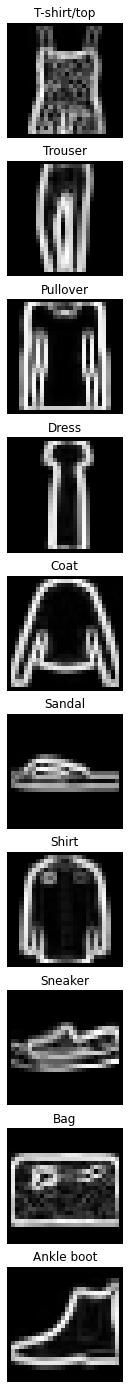

In [ ]:
sobel_kernel_analysis(train_images, train_labels)

In [ ]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Model Structure 
def model_gen(conv_layers, dropout_rate):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  for _ in range(conv_layers-1):
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(dropout_rate))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
# Implement the loss (cross-entropy)
def custom_categorical_cross_entropy(y_true, y_pred):
  y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
  y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
  loss = y_true * K.log(y_pred)
  loss = -K.sum(loss, -1)
  return loss

In [ ]:
def cnn_analysis(train_images, train_labels, test_images, test_labels):
  optimizers = [SGD, RMSprop, Adam, Adagrad]
  opt_names = ['SGD', 'RMSprop', 'Adam', 'Adagrad']

  fig, ax = plt.subplots(figsize=(10, 10))
  for i, opt in enumerate(optimizers):
    model =  model_gen(conv_layers = 2, dropout_rate = 0.2)
    model.compile(loss = custom_categorical_cross_entropy , optimizer = opt(learning_rate=0.0005), metrics = ['accuracy'])
    print('Training using ',opt_names[i])
    history = model.fit(train_images, train_labels, epochs=10, verbose=1, validation_data=(test_images, test_labels))

    ax.plot(history.history['loss'], label='Training loss of %s' %opt_names[i])
    ax.legend()
    
  plt.show()

Training using  SGD
Epoch 1/10
1875/1875 [==============================] - 20s 6ms/step - loss: 1.7861 - accuracy: 0.6992 - val_loss: 0.5547 - val_accuracy: 0.8037
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5541 - accuracy: 0.8039 - val_loss: 0.4859 - val_accuracy: 0.8273
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4925 - accuracy: 0.8227 - val_loss: 0.4567 - val_accuracy: 0.8361
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4575 - accuracy: 0.8359 - val_loss: 0.4327 - val_accuracy: 0.8432
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4338 - accuracy: 0.8449 - val_loss: 0.4188 - val_accuracy: 0.8481
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4168 - accuracy: 0.8524 - val_loss: 0.4072 - val_accuracy: 0.8578
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4031 - accuracy: 0.8548 - val_l

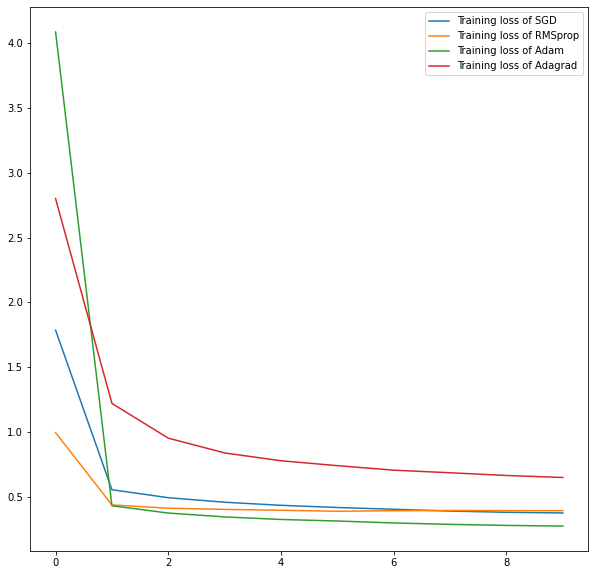

In [ ]:
cnn_analysis(train_images, train_labels, test_images, test_labels)

From the above plot, we can observe that the minimum loss is obtained when Adam is used as an optimizer. SGD and RMSprop have similar level of performance. Adagrad performs the worst among all 4 optimizers. Epochs is chosen as 10 and learning rate is chosen as 0.0005 for all 4 training methods. Training accuracy of 89.81% and testing accuracy of 88.45% is achieved with Adam as optimizer. The model has 2 convolutional layers with a dropout of 0.2. 

In [ ]:
def conv_layer_analysis(train_images, train_labels, test_images, test_labels):
  fig, ax = plt.subplots(2, figsize=(10, 10))

  for conv_layers in range(1, 4):
    model = model_gen(conv_layers = conv_layers, dropout_rate = 0.2)
    print('Training using ',conv_layers,' convolutional layers')
    model.compile(loss = custom_categorical_cross_entropy , optimizer = Adam(learning_rate=0.0005), metrics = ['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, verbose=1, validation_data=(test_images, test_labels))

    ax[0].plot(history.history['accuracy'], label='Training accuracy when number of convolutional layers is %d' %conv_layers)
    ax[0].plot(history.history['val_accuracy'], label='Testing accuracy when number of convolutional layers is %d' %conv_layers)
    ax[0].legend()

    ax[1].plot(history.history['loss'], label='Training loss when number of convolutional layers is %d' %conv_layers)
    ax[1].plot(history.history['val_loss'], label='Testing loss when number of convolutional layers is %d' %conv_layers)
    ax[1].legend()

  plt.show()

In [ ]:
def dropout_analysis(train_images, train_labels, test_images, test_labels):
  dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

  fig, ax = plt.subplots(2, figsize=(10, 10))
  for dropout_rate in dropout_rates:
    model = model_gen(conv_layers = 2, dropout_rate = dropout_rate)
    print('Training using ',dropout_rate,' as dropout rate')
    model.compile(loss = custom_categorical_cross_entropy , optimizer = Adam(learning_rate=0.0005), metrics = ['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, verbose=1, validation_data=(test_images, test_labels))

    ax[0].plot(history.history['accuracy'], label='Training accuracy when dropout rate is %f' %dropout_rate)
    ax[0].plot(history.history['val_accuracy'], label='Testing accuracy when dropout rate is %f' %dropout_rate)
    ax[0].legend()

    ax[1].plot(history.history['loss'], label='Training loss when dropout rate is %f' %dropout_rate)
    ax[1].plot(history.history['val_loss'], label='Testing loss when dropout rate is %f' %dropout_rate)
    ax[1].legend()

  plt.show()

Training using  1  convolutional layers
Epoch 1/10
1875/1875 [==============================] - 20s 5ms/step - loss: 11.4255 - accuracy: 0.2900 - val_loss: 11.3362 - val_accuracy: 0.2966
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 9.4420 - accuracy: 0.4063 - val_loss: 5.4590 - val_accuracy: 0.6038
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8517 - accuracy: 0.8231 - val_loss: 0.4052 - val_accuracy: 0.8608
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3613 - accuracy: 0.8725 - val_loss: 0.3678 - val_accuracy: 0.8740
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3164 - accuracy: 0.8862 - val_loss: 0.3637 - val_accuracy: 0.8746
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2918 - accuracy: 0.8936 - val_loss: 0.3388 - val_accuracy: 0.8833
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2753 - accuracy

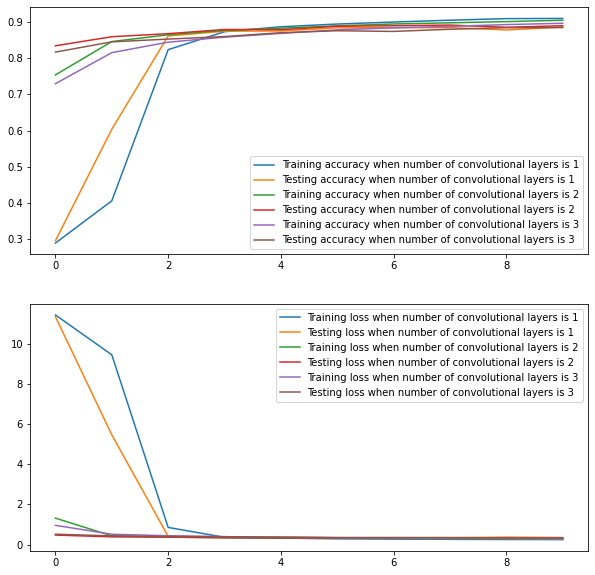

In [ ]:
conv_layer_analysis(train_images, train_labels, test_images, test_labels)

From the above plot, we can observe that the training and testing loss is similar for all different number of convolutional layers. The training accuracy averages around 90% and testing accuracy averages around 88.5%. 

Training using  0.1  as dropout rate
Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6220 - accuracy: 0.7656 - val_loss: 0.3987 - val_accuracy: 0.8588
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3708 - accuracy: 0.8660 - val_loss: 0.3634 - val_accuracy: 0.8737
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3285 - accuracy: 0.8816 - val_loss: 0.3488 - val_accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3035 - accuracy: 0.8892 - val_loss: 0.3249 - val_accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2809 - accuracy: 0.8960 - val_loss: 0.3517 - val_accuracy: 0.8765
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2662 - accuracy: 0.9023 - val_loss: 0.3323 - val_accuracy: 0.8824
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2544 - accurac

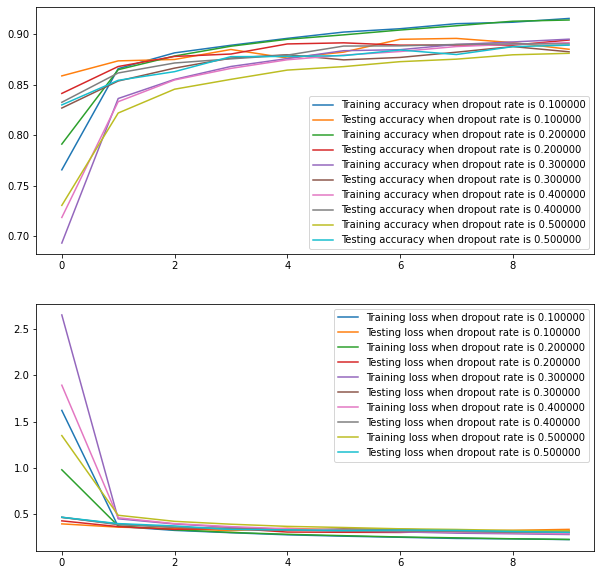

In [ ]:
dropout_analysis(train_images, train_labels, test_images, test_labels)

From the above plot, we can observe that the training accuracy is slightly higher than others when dropout rate is 0.1 and 0.2. Testing accuracy seems to be same for all dropout rates which averages around 88.75%. Dropout rate of 0.2 feels like the ideal choice as the difference between training accuracy and testing accuracy is lesser in comparison to dropout rate of 0.1 When dropout rate is 0.2, training accuracy is 91.43% and testing accuracy is 89.44%.

## Link to the video ##
https://drive.google.com/file/d/1fs58sgGBoVFk33O5yLruz1UqxOEgpGiZ/view?usp=sharing
